# Task -1 Anomaly detection
## Student ID1:
## Student ID2:
### some notes: you can install Anaconda (python 3 prefered)

In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

# Load Data

In [2]:
df = pd.read_csv("conn_attack.csv",
                 names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [3]:
# .dropna() used for drop row contain NaN values
df=df.dropna()

In [5]:
# show 3 example data from datasets
df.head(3)

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364


# Data Exploration

Explore the data, understand the featues, statistics visualize the inputs,
(Explain how you explore the data)

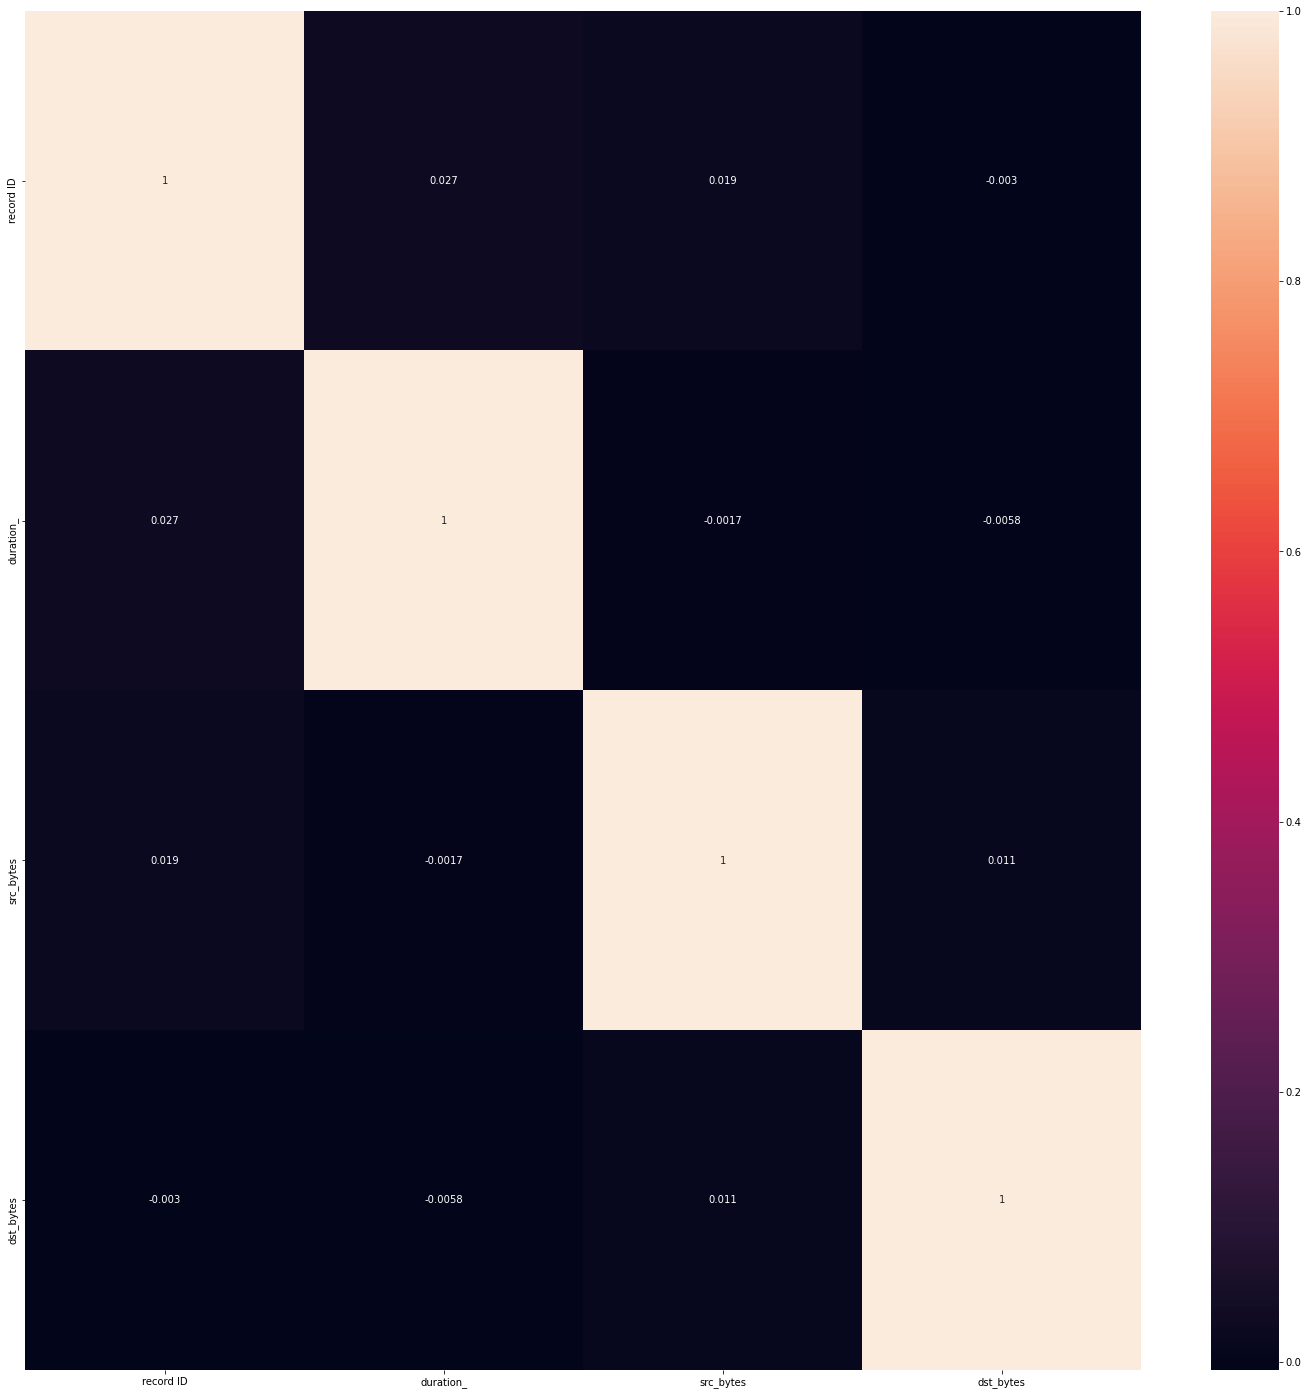

In [11]:
# create heatmap from correlation data (per each column values)
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True);

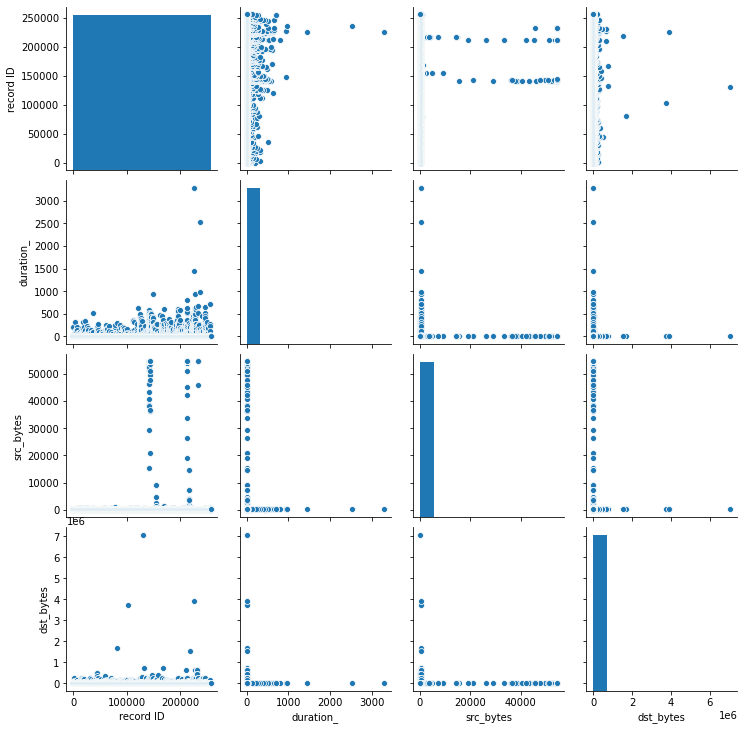

In [27]:
# creates a grid of Axes such that each variable in data will by shared in the 
# y-axis across a single row and in the x-axis across a single column
sns.pairplot(df);

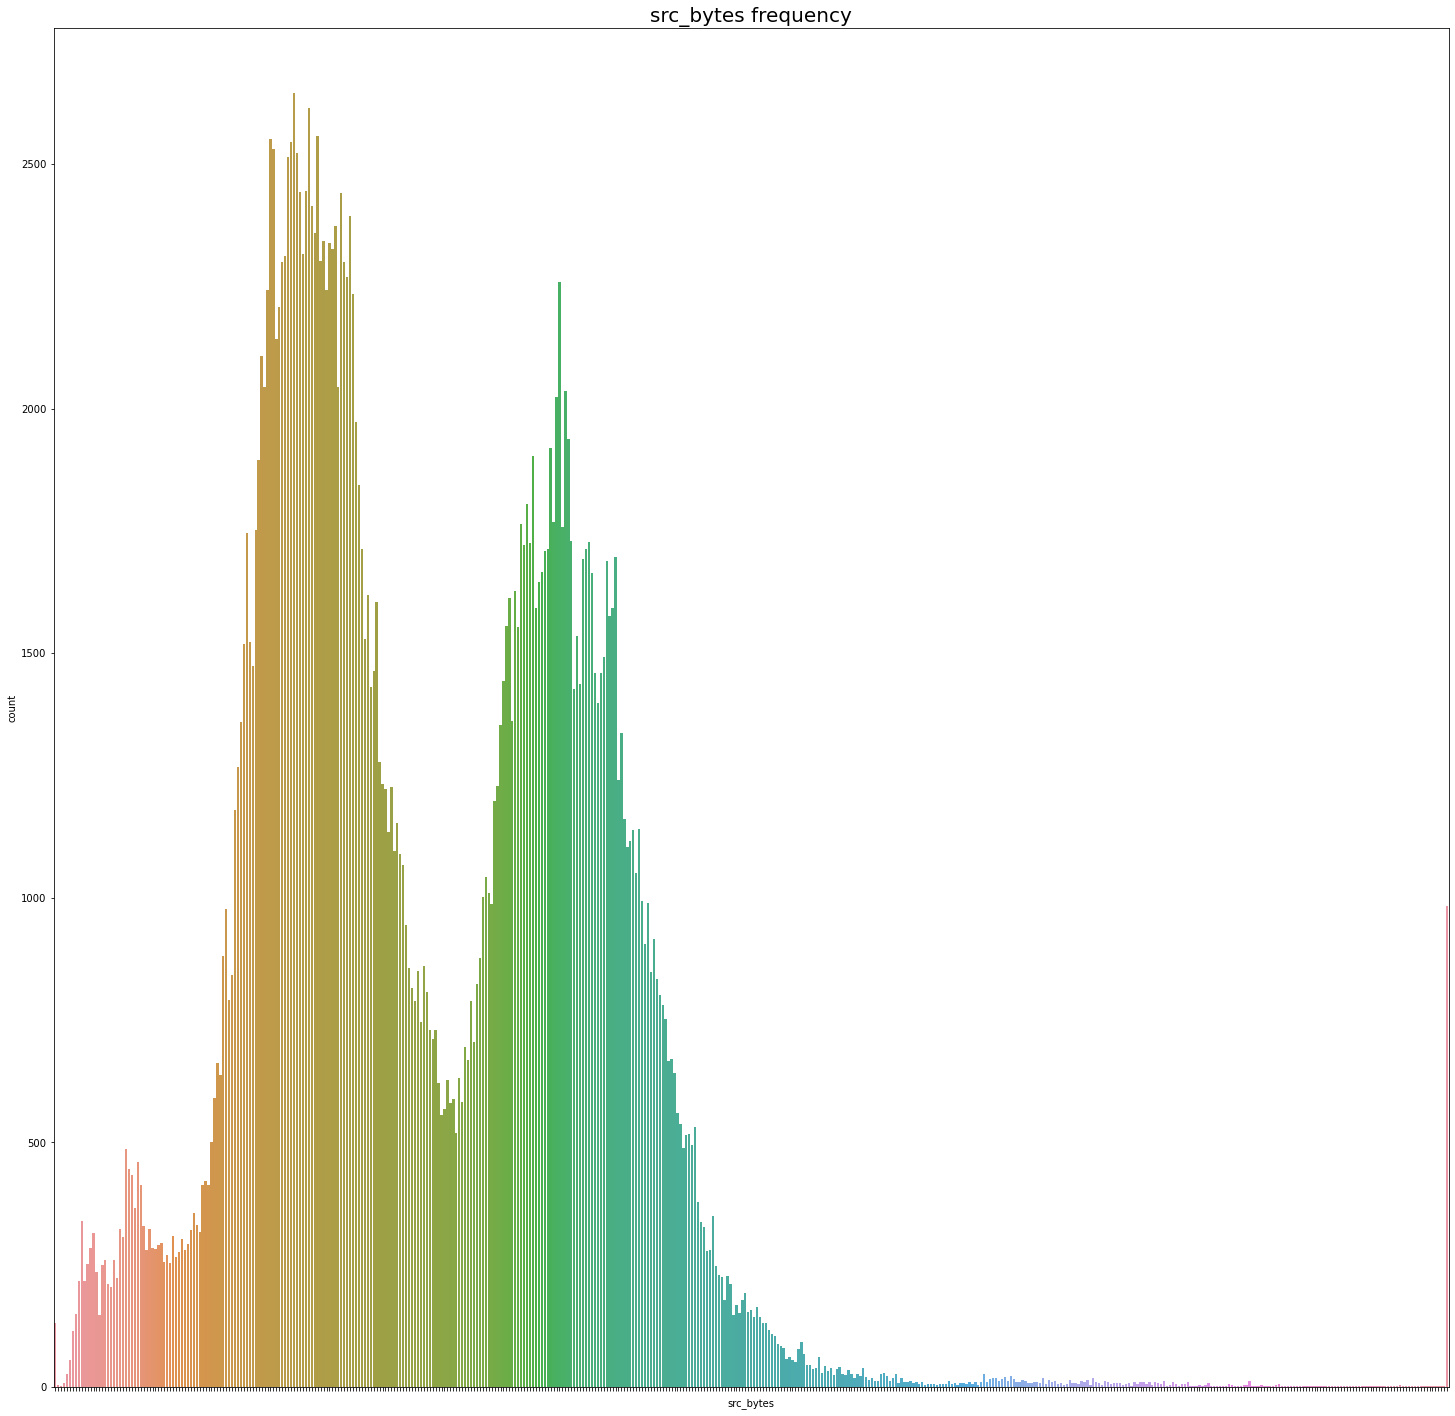

In [43]:
# Show the counts of observations in each categorical bin using bars
plt.figure(figsize=(25,25));sns.countplot(df.src_bytes);plt.title("src_bytes frequency", fontdict={'fontsize':20});plt.gca().axes.xaxis.set_ticklabels([]);

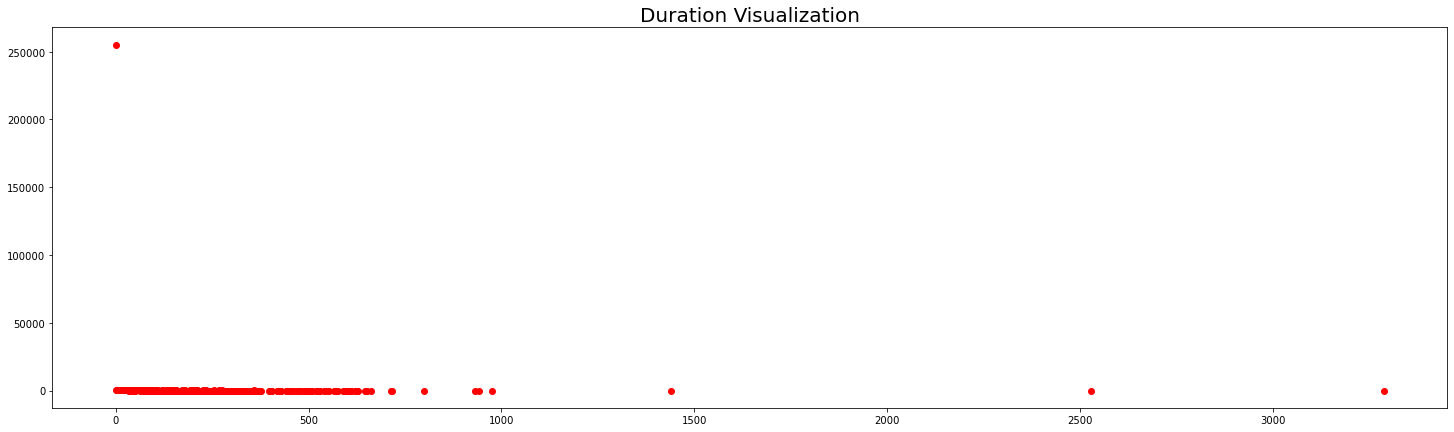

In [62]:
# create visualisation base unique value in duration_ column
plt.figure(figsize=(25,7))
plt.scatter(df.duration_.value_counts().sort_values(ascending=True).keys().tolist(),
        df.duration_.value_counts().sort_values(ascending=True).values.tolist(),
        color="red")
plt.title("Duration Visualization", fontdict={'fontsize':20});

Summary : "Based on some of the visualizations above, it can be seen that there are many normal data patterns."

# Machine Learning Algorithm

Which algorithms group are suitable for this task and why?

Use K-Means => The number of clusters identified from data by algorithm is represented by 'K' in K-means. In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum.

In [63]:
from sklearn.model_selection import train_test_split # for split datasets
from sklearn.cluster import KMeans # use this ML algorithm

In [70]:
# get train data
X = df[["src_bytes","dst_bytes"]].values

In [71]:
# load model & fit
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

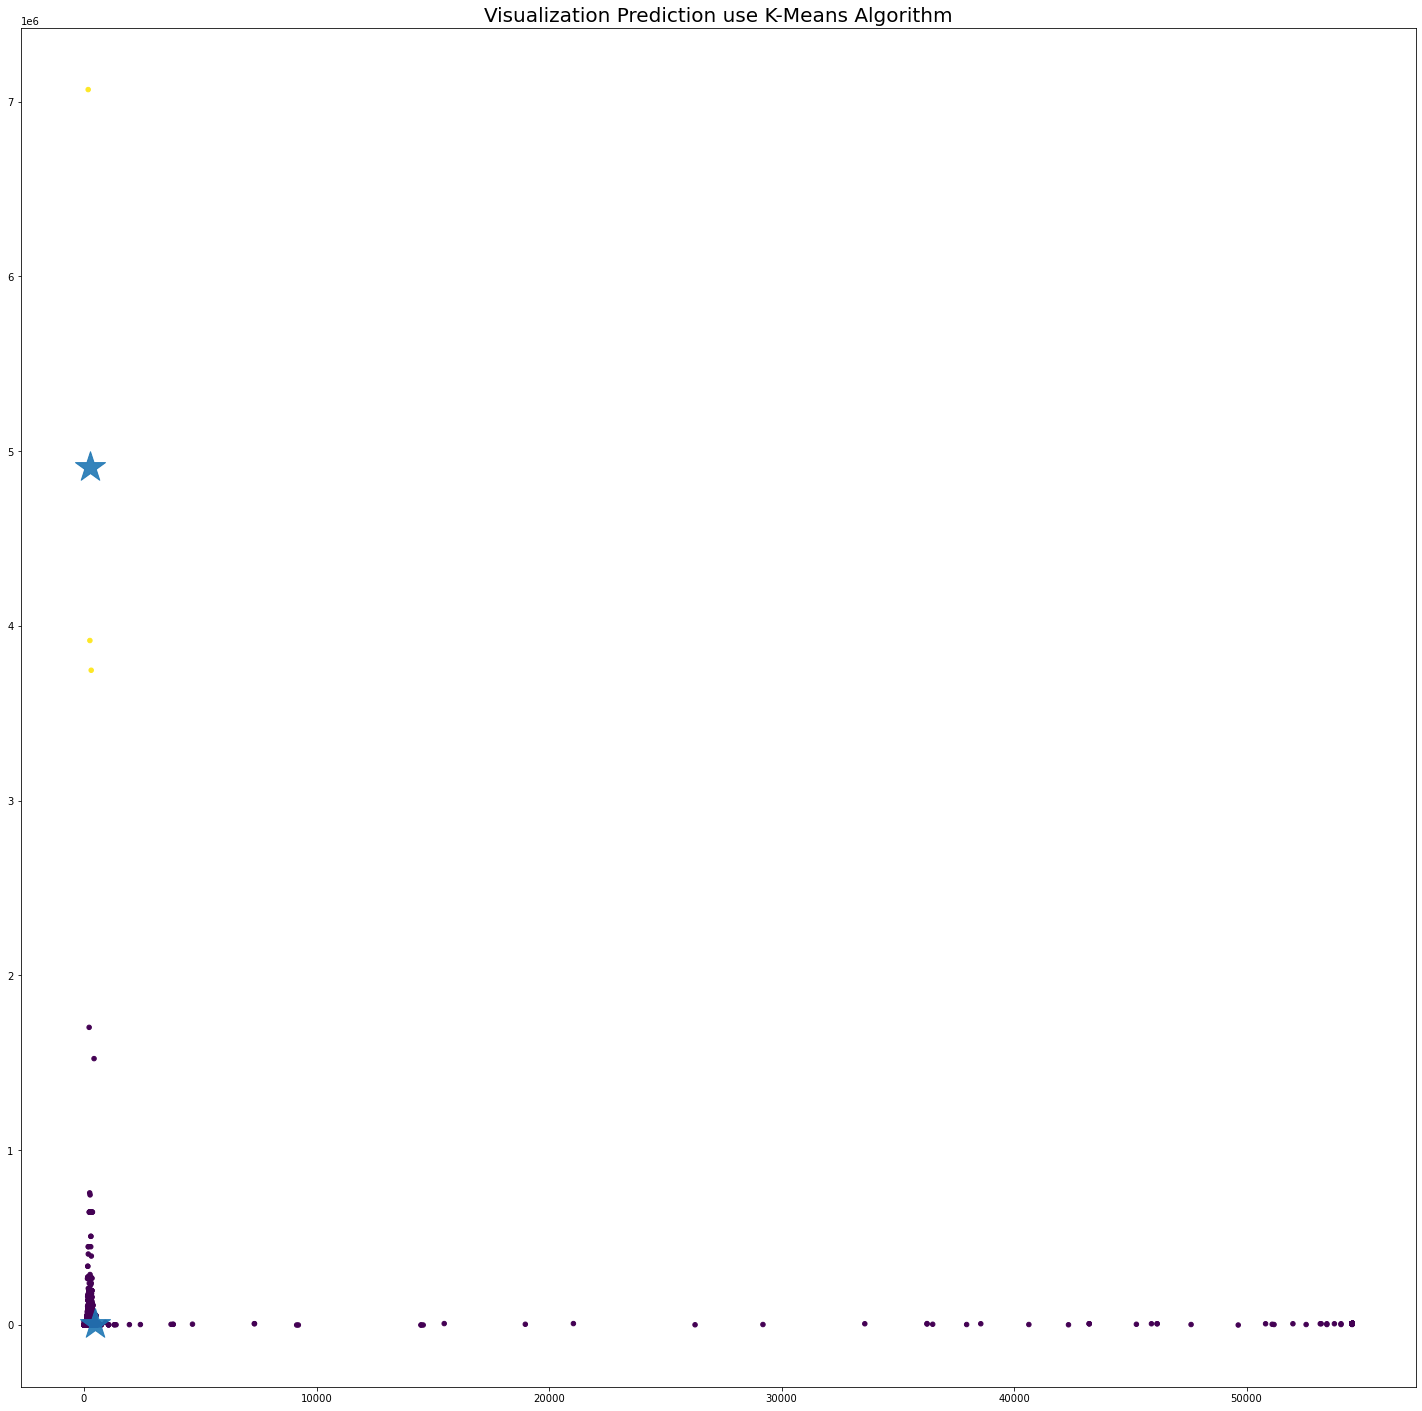

In [100]:
# visualize our model prediction
plt.figure(figsize=(25,25))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = kmeans.cluster_centers_
plt.title("Visualization Prediction use K-Means Algorithm", fontdict={'fontsize':20})
plt.scatter(centers[:, 0], centers[:, 1], marker="*",cmap='winter', s=1000, alpha=0.9);

In [106]:
# base our model, we create binary label use in result dataframe
clusterer = KMeans(n_clusters=2) # 2 => 1/0 
preds = clusterer.fit_predict(X)

In [107]:
# create final dataframe
final_data = pd.DataFrame({"record ID": df["record ID"],
                           "is_anomaly?_":preds})

In [109]:
# sample of final_dataframe
final_data.sample(3)

,record ID,is_anomaly?_
9634,9635,0
156567,156568,0
22166,22167,0


In [110]:
# save dataframe to csv file
final_data.to_csv("submission.csv")

# Report :

What is the approach you tried? Why them?

I use the K-means algorithm because it is an un-supervised machine learning model (it doesn't have a label)

# ----------------------------------------------------------------------------------------------------

How do you know the algorithm is good?

In [116]:
from sklearn import metrics
from tqdm import tqdm
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for k in tqdm(range(1, 10)):
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:23<00:00,  9.28s/it]


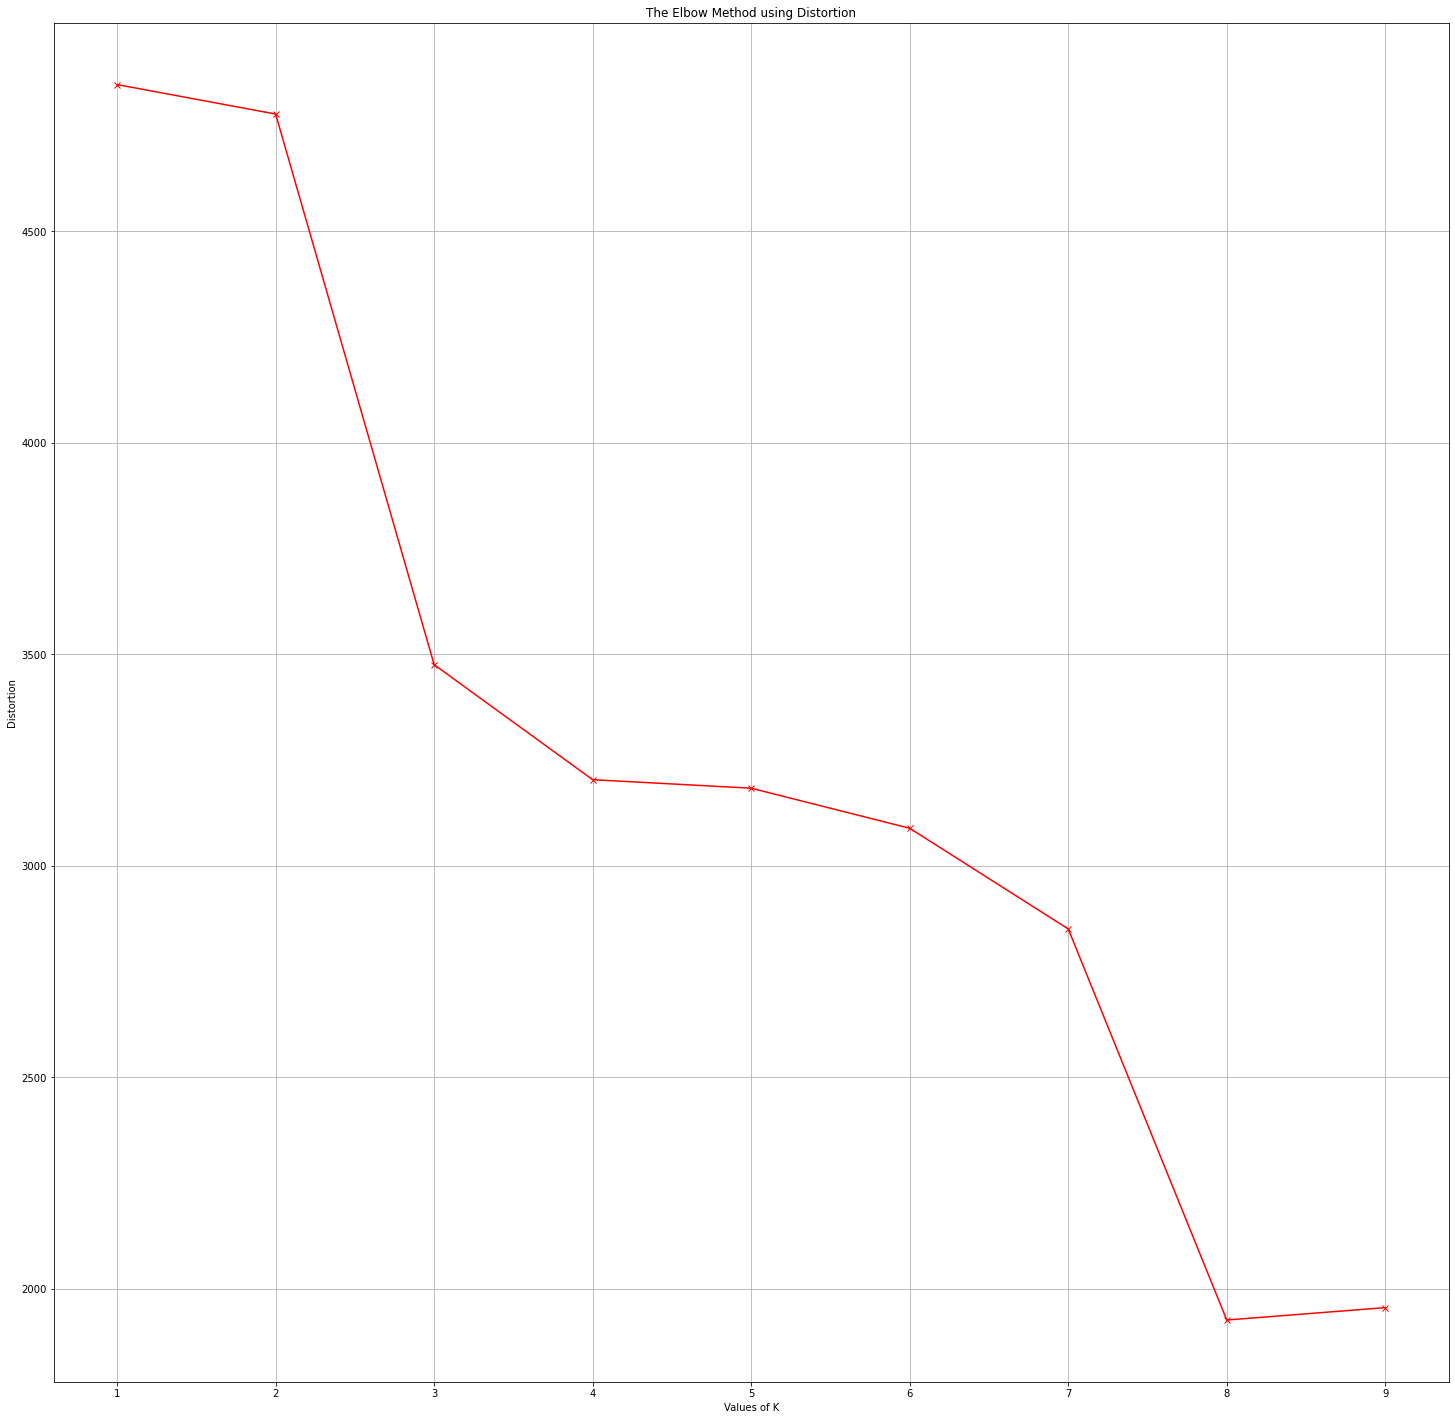

In [132]:
plt.figure(figsize=(25,25));plt.plot(K, distortions, 'bx-', color="red");plt.xlabel('Values of K');plt.ylabel('Distortion');plt.title('The Elbow Method using Distortion');plt.grid(True);

In [130]:
for key, val in mapping1.items():
    print(f'{key} : {str(round(val))[0:2]}.{str(round(val))[3:5]} %')

1 : 48.7 %
2 : 47.7 %
3 : 34.6 %
4 : 32.4 %
5 : 31.4 %
6 : 30.9 %
7 : 28.1 %
8 : 19.7 %
9 : 19.6 %


based on the elbow method, the best K-number is number 2, with an accuracy of 47.7%.